#### WaveNumber to WaveLength Domain conversion( Radiance values)
#### Author: Ramesh Bhatta, CIS, RIT
#### Data: Dr. Emmet Ientilucci, CIS, RIT

In [7]:
## Importing necessary Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

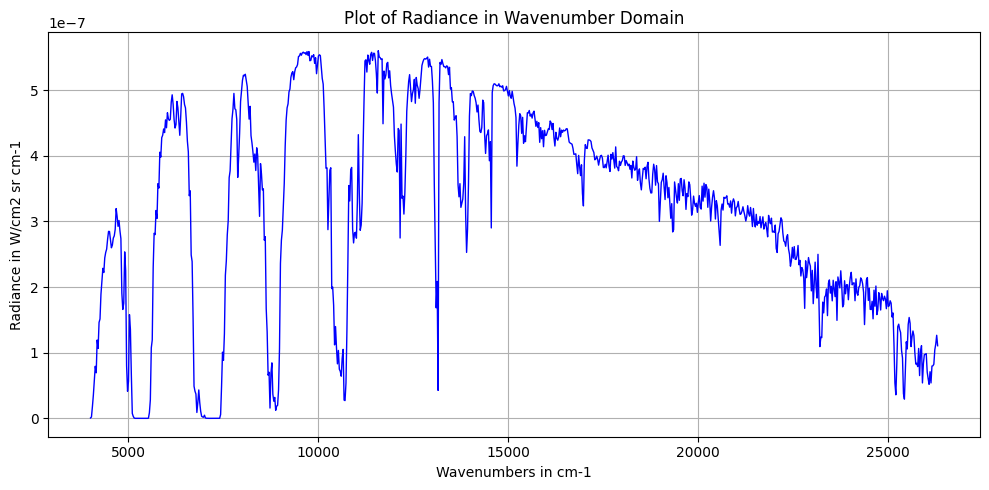

In [8]:
## Loading the Radiance Vs Wavenumber data and Plotting

WN_data_df = pd.read_csv("WN Data.txt", delimiter='\t', index_col=False)

## Plotting the Data

WN = WN_data_df['WN']
Radiance_with_WN = WN_data_df['W/cm2 sr cm-1']
fig = plt.figure(figsize=(10,5))
plt.plot(WN,Radiance_with_WN, color = 'blue', linewidth = 1)
plt.xlabel("Wavenumbers in cm-1")
plt.ylabel("Radiance in W/cm2 sr cm-1")
plt.title("Plot of Radiance in Wavenumber Domain")
plt.grid(True)
plt.tight_layout()
plt.show()


**Using the Conversion factor to convert the radiance in wavenumbers to radiance in wavelength.**

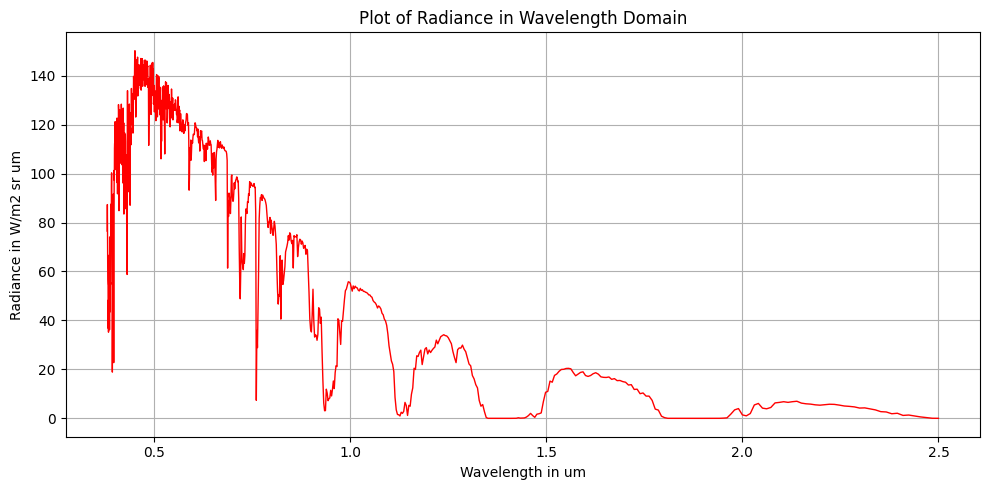

In [9]:
## Calculation of necessary values in new dataframe

new_df = WN_data_df
new_df['wavelength(um)'] = (10**4)*(1/new_df['WN'])
new_df['W/m2 sr cm-1'] = new_df['W/cm2 sr cm-1']*(10**4)
new_df['W/m2 sr um'] = 10**4*(new_df['W/m2 sr cm-1']/(new_df['wavelength(um)']**2))

## Plotting In Wavlength Domain

fig = plt.figure(figsize=(10,5))
wavelength = new_df['wavelength(um)']
radiance_with_wavelength = new_df['W/m2 sr um']
plt.plot(wavelength, radiance_with_wavelength, color = 'red', linewidth = 1)
plt.xlabel("Wavelength in um")
plt.ylabel("Radiance in W/m2 sr um")
plt.title("Plot of Radiance in Wavelength Domain")
plt.grid(True)
plt.tight_layout()
plt.show()

**Calculating the Area under curve for both plots to verify the conversion- using Trapezoidal rule**

In [10]:
## Final DataFrame Looks Like:

print("\033[1m"+'Final Data-Frame'+ "\033[0;0m")
new_df

Final Data-Frame


,WN,W/cm2 sr cm-1,wavelength(um),W/m2 sr cm-1,W/m2 sr um
0,4000,5.700000e-10,2.500000,0.000006,0.009120
1,4025,2.100000e-09,2.484472,0.000021,0.034021
2,4050,1.777000e-08,2.469136,0.000178,0.291472
3,4075,3.533000e-08,2.453988,0.000353,0.586677
4,4100,5.824000e-08,2.439024,0.000582,0.979014
...,...,...,...,...,...
888,26200,8.245000e-08,0.381679,0.000825,56.596978
889,26225,1.042900e-07,0.381316,0.001043,71.725513
890,26250,1.129600e-07,0.380952,0.001130,77.836500
891,26275,1.265000e-07,0.380590,0.001265,87.332517


In [11]:
## For Plot 1: Radiance with Wavenumber

x_WN = new_df['WN'].values
y_WN = new_df['W/m2 sr cm-1'].values
area_WN = np.trapz(y_WN, x = x_WN)
print("Area Under Curve for plot using wavenumbers = {}".format(area_WN))

## For Plot 2: Radiance with Wavelength

x_WL = new_df['wavelength(um)'].values
y_WL = new_df['W/m2 sr um'].values
area_WL = np.trapz(y_WL, x = x_WL)
print("Area Under Curve for plot using wavelength = {}".format(area_WL))
print("So both Areas are equal \n and Because of the Direction of Integration one area is positive and another area is negative\nand sign shouldnt matter here while representing area!!!")

Area Under Curve for plot using wavenumbers = 71.3376025
Area Under Curve for plot using wavelength = -71.33797664881857
So both Areas are equal 
 and Because of the Direction of Integration one area is positive and another area is negative
and sign shouldnt matter here while representing area!!!


/var/folders/_z/xfqh2srd4zg69mc724gvhc6m0000gn/T/ipykernel_20769/1722705177.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_WN = np.trapz(y_WN, x = x_WN)
/var/folders/_z/xfqh2srd4zg69mc724gvhc6m0000gn/T/ipykernel_20769/1722705177.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_WL = np.trapz(y_WL, x = x_WL)
